## data prepare

### data import

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(os.getcwd())
data_raw = pd.read_csv(r'data\Project_Data_EE4C12_S&S_EMG.csv')
data_raw.head()

c:\Users\blacksilver\Desktop\MLEE_EMG


,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


### data norm

In [4]:
def data_normalize(data):
    data_norm = data - np.mean(data)
    data_norm = data_norm / np.std(data_norm)
    return data_norm

In [5]:
data_copy = data_raw.copy()
for col in data_raw.columns[1:9]:
    data_copy[col]=data_normalize(data_raw[col])

### class extract

In [6]:
data_copy = data_raw.copy()
data_classes = []
n_classes = data_copy['class'].max()+1
for class_ in range(n_classes):
    data_classes.append(data_copy[data_copy['class'] == class_])

In [7]:
for i in range(1,len(data_classes)):
    print(len(data_classes[i]))

250055
243193
249494
251570
251733
253009
13696


## PCA

In [8]:
# import PCA
from sklearn.decomposition import PCA

In [9]:
N = 5 #number of principal components 
pca = PCA(N) # Initialize PCA
data_signal = data_copy.iloc[:,1:9]

features_ori = pca.fit_transform(data_signal) # feature extraction
print(features_ori.shape)

(4237907, 5)


In [10]:
## explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_) * 100)

[0.36155271 0.16096484 0.15187691 0.11556934 0.07802903]
86.79928368871698


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sqlalchemy import true
# clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
def Classifier(clf,X_input,Y_input, normlize = 'false'):
    X_train, X_val, y_train, y_val = train_test_split(X_input, Y_input, test_size=0.25, random_state=4720)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    # print accuracyprecision recall f1 score auc,
    # roc of training, roc of validation
    # print('Accuracy:',accuracy_score(y_val, y_pred))
    # print('Precision:',precision_score(y_val, y_pred))
    # print('Recall:',recall_score(y_val, y_pred))
    # print('F1 score:',f1_score(y_val, y_pred))
    # print('AUC:',roc_auc_score(y_val, y_pred))
    
    
    # fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(15,4))
    
    # plot_roc_curve(clf, X_train, y_train, ax=ax[0])
    # plot_roc_curve(clf, X_val, y_val, ax=ax[1])
    
    # plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_val,y_pred,normalize='true')

clf_logistic = LogisticRegression()
clf_DTC = DecisionTreeClassifier()
# Classifier(clf_logistic,features_ori,data_copy['class'])

In [12]:
data2=np.concatenate((data_classes[1:]), axis=0)

In [13]:
data2.shape

(1512750, 11)

In [14]:
N = 5 #number of principal components 
pca = PCA(N) # Initialize PCA
data_signal = data2[:,1:9]

features_ori = pca.fit_transform(data_signal) # feature extraction
print(features_ori.shape)
## explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_) * 100)

(1512750, 5)
[0.35737077 0.16215752 0.15362321 0.1174545  0.07861749]
86.9223495223036


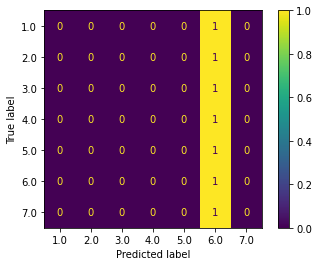

In [15]:
Classifier(clf_logistic,data2[:,:8],data2[:,9])

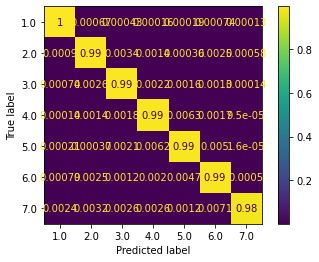

In [16]:
Classifier(clf_DTC,data2[:,:8],data2[:,9])

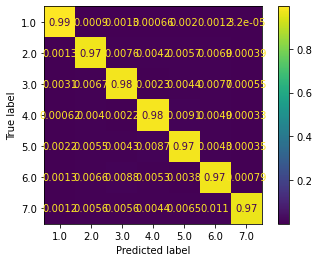

In [17]:
clf_logistic = LogisticRegression(random_state=0, max_iter=1000)
Classifier(clf_DTC,features_ori,data2[:,9])

In [18]:
data_classes

[          time  channel1  channel2  channel3  channel4  channel5  channel6  \
 0            1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
 1            5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
 2            6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
 3            7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
 4            8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
 ...        ...       ...       ...       ...       ...       ...       ...   
 4237902  50962   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
 4237903  50963   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
 4237904  50964   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
 4237905  50965   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
 4237906  50966   0.00001  -0.00001  -0.00002  -0.00004  -0.00012   0.00000   
 
          channel7  channel8  class  label  
 0   

In [19]:
clf_logistic = LogisticRegression

In [20]:
## xbgboost

In [21]:
data_all=np.concatenate((data_classes[1:]), axis=0)
data_all[:,10]

array([ 1.,  1.,  1., ..., 30., 30., 30.])

In [22]:
data_all=np.concatenate((data_classes), axis=0)
data_all.shape

(4237907, 11)

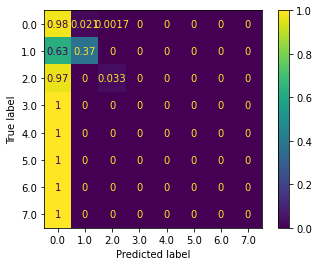

In [24]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
## train
data_all=np.concatenate((data_classes), axis=0)
data_signal = data_all[:,:8]

N = 5 #number of principal components 
pca = PCA(N) # Initialize PCA


features_ori = pca.fit_transform(data_signal) # feature extraction

# gradient boost random forest
# clf_GBC = GradientBoostingClassifier()
clf_RFC = RandomForestClassifier(n_estimators=10, max_leaf_nodes=35, n_jobs=-1, bootstrap = True)
# clf_xgb = XGBClassifier()
Classifier(clf_RFC,features_ori,data_all[:,9])



In [27]:
data_all.shape

(4237907, 11)

In [31]:
data_signal = data_all[:,1:9]
data_signal.shape

(4237907, 8)

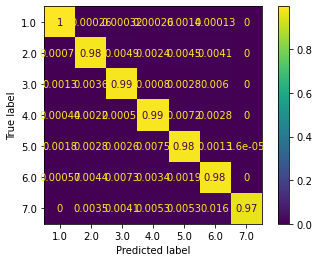

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
## train
data_all=np.concatenate((data_classes[1:]), axis=0)
data_signal = data_all[:,1:9]


# gradient boost random forest
# clf_GBC = GradientBoostingClassifier()
clf_RFC = RandomForestClassifier(n_jobs=-1, bootstrap = True)
# clf_xgb = XGBClassifier()
Classifier(clf_RFC,data_signal,data_all[:,9])

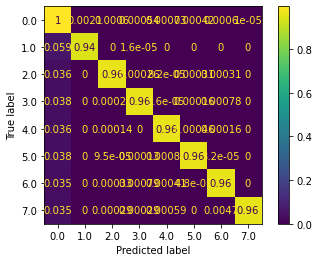

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
## train
data_all=np.concatenate((data_classes), axis=0)
data_signal = data_all[:,1:9]


# gradient boost random forest
# clf_GBC = GradientBoostingClassifier()
clf_RFC = RandomForestClassifier(n_jobs=-1, bootstrap = True)
# clf_xgb = XGBClassifier()
Classifier(clf_RFC,data_signal,data_all[:,9])

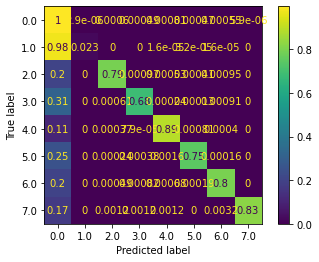

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
## train
data_all=np.concatenate((data_classes), axis=0)
data_signal = data_all[:,1:9]
N_PCA = 5
pca = PCA(N_PCA) # Initialize PCA
features_ori = pca.fit_transform(data_signal) # feature extraction

# gradient boost random forest
# clf_GBC = GradientBoostingClassifier()
clf_RFC = RandomForestClassifier(n_jobs=-1, bootstrap = True)
# clf_xgb = XGBClassifier()
Classifier(clf_RFC,features_ori,data_all[:,9])

In [ ]:
## https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725
## https://rapids.ai/start.html#get-rapids

In [ ]:
## AdaBoost
from sklearn.ensemble import AdaBoostClassifier
## train


clf_Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
Classifier(clf_Ada,data_signal,data_all[:,9])



KeyboardInterrupt: 

In [ ]:
import torch
print(torch.__version__)

print(torch.version.cuda)
print(torch.backends.cudnn.version())

ModuleNotFoundError: No module named 'torch'

???

gesture 7 太少怎么办